In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import random
import math
import scipy.stats as stats
from matplotlib import dates

In [9]:
def durationtime(currentrow):
    duration="Unknown"
    st=currentrow['Start-time']
    et=currentrow['End-time']
    if st.split(' ')[-1] == 'AM' or st.split(' ')[-1] == 'PM':
        date_time_start = datetime.datetime.strptime(st, '%m/%d/%Y %I:%M %p')
        date_time_end = datetime.datetime.strptime(et, '%m/%d/%Y %I:%M %p')
    else:
        date_time_start = datetime.datetime.strptime(st, '%m/%d/%Y %H:%M')
        date_time_end = datetime.datetime.strptime(et, '%m/%d/%Y %H:%M')
    duration=date_time_end-date_time_start
    return duration

def dayparttag(currentrow):
    timespan="Unknown"
    st=currentrow['Start-time'].split(' ')
    if st[-1] == 'AM' or st[-1] == 'PM':
        date_time_start=datetime.datetime.strptime(st[1] + st[2], '%I:%M%p')
    else:
        date_time_start=datetime.datetime.strptime(st[1], '%H:%M')
    
    morning=datetime.datetime.strptime("12:00:00","%H:%M:%S")
    afternoon=datetime.datetime.strptime("18:00:00","%H:%M:%S")
    
    if date_time_start < morning:
        timespan="Morning"
    elif date_time_start < afternoon:
        timespan="Afternoon"
    else:
        timespan="Evening"
    return timespan

def weekdaytag(currentrow):
    st=currentrow['Start-time'].split('+')
    st2=st[0].split(' ')
    dt=st2[0]
    month,day,year=(int(x) for x in dt.split('/'))
    date_time=datetime.date(year,month,day).weekday()
    return date_time

def holidaytag(currentrow):
    holiday="Not"
    winterbreakstart=datetime.datetime(2019,12,20)
    winterbreakend=datetime.datetime(2019,1,14)
    springbreakstart=datetime.datetime(2019,3,25)
    springbreakend=datetime.datetime(2019,4,10)
    summerbreakstart=datetime.datetime(2019,5,18)
    summerbreakend=datetime.datetime(2019,8,28)
    fallbreakstart=datetime.datetime(2019,11,20)
    fallbreakend=datetime.datetime(2019,12,2)
    st=currentrow['Start-time'].split(' ')
    date_time=datetime.datetime.strptime(st[0],"%M/%d/%Y")
    if (date_time<=winterbreakend) or (date_time>=winterbreakstart):
        holiday="Yes"
    elif (date_time>=springbreakstart) and (date_time<=springbreakend):
        holiday="Yes"
    elif (date_time>=summerbreakstart) and (date_time<=summerbreakend):
        holiday="Yes"
    elif (date_time>=fallbreakstart) and (date_time<=fallbreakend):
        holiday="Yes"
    return holiday

def activitytag(currentrow):
    keywords=["Meet","Party","Work","Class","Movie","Tennis","Gym","Lab","HW","Due","Flight","Ceremony","School","Exam"]
    s=str(currentrow['Activity'])
    update="Miscellaneous"
    for j in range(len(keywords)):
        if (keywords[j] in s) or (keywords[j].lower() in s):
            update=str(keywords[j])     
    return update

def checktags(currentevent,currenttag):
    synonymoustag1=["Tennis","Yoga","Rec Center","Gym","Run","Practice","Salsa","Hiking","Dance","Run","Climb","Doctor"]
    synonymoustag2=["PHYS","Lecture","APPM","Interview","Project","CSCI","Moodle","Canvas","Discussion","Registration","Submit","Enrollment","Grade","Grading","Appointment","Recitation","Review","Debug","Midterm","Workshop","Class","Study","Writing","Write","Design","Meet","School","Homework","Due","Exam","CSCI","Final","Library","Campus","Class","Enrollment","Midterm","Graduate","Quiz","Finals","Lab","Ceremony"]
    synonymoustag3=["Dinner","Lunch","Breakfast","Coffee","Visit","FEST","Show","EMAIL","Brunch","Birthday","Career","Fair"]
    synonymoustag4=["Flight","Arrive","Pick up","Ride","Trip"]
    synonymoustag5=["Party","Movie","Night","Pool","BBQ","Performance","Event","Club"]
    for k in synonymoustag1:
        if (k in currentevent) or (k.lower() in currentevent):
            currenttag="Health"
    for k2 in synonymoustag2:
        if (k2 in currentevent) or (k.lower() in currentevent):
            currenttag="Academic"
    for k3 in synonymoustag3:
        if (k3 in currentevent) or (k3.lower() in currentevent):
            currenttag="Personal"
    for k4 in synonymoustag4:
        if (k4 in currentevent) or (k4.lower() in currentevent):
            currenttag="Travel"
    for k5 in synonymoustag5:
        if (k5 in currentevent) or (k5.lower() in currentevent):
            currenttag="Entertainment"
    
    return currenttag

def clean_csv(filepath):
    df = pd.read_csv(filepath, error_bad_lines=False, warn_bad_lines=False)
    df.dropna(how='all', axis=1)
    df.rename(columns={'SUMMARY':'Activity','DTSTART':'Start-time','DTEND':'End-time','NOTES':'Note','LOCATION':'Location'},inplace=True)
    droplist = ['DUE', 'ATTENDEE', 'PRIORITY', 'URL', 'CALENDAR', 'UID']
    df = df.drop((i for i in droplist), 1)
    df['Tag']=np.nan
    df['Duration']=np.nan
    df2=pd.DataFrame(columns=['Activity','Tag','Start-time','End-time','Duration','Part of day','Weekday','Holiday'])
    for i,row in df.iterrows():
        s=str(row['Activity'])
        start_time = str(row['Start-time'])
        end_time = str(row['End-time'])
        updatetag=activitytag(row)
        updatetag=checktags(s,updatetag)
        duration=durationtime(row)
        timespan=dayparttag(row)
        date_time=weekdaytag(row)
        holiday=holidaytag(row)
        
        data=pd.DataFrame({'Activity':[s],'Tag':[updatetag],'Start-time':[start_time],'End-time':[end_time],'Duration':[duration],'Part of day':[timespan],'Weekday':[date_time],'Holiday':[holiday]}) # tag
        df2=df2.append(data)
    return df2
    

In [3]:
df1 = clean_csv('dataset3.csv')
df2 = clean_csv('dataset2.csv')

In [4]:
df3 = clean_csv('dataset1.csv')

In [5]:
def parse_date(date):
    check = date.split(' ')
    if check[-1] == 'AM' or check[-1] == 'PM':
        return datetime.datetime.strptime(date,"%m/%d/%Y %I:%M %p")
    else:
        return datetime.datetime.strptime(date,"%m/%d/%Y %H:%M")

def count_events(df, column, value = None, year = None):
    if(value is not None):
        total = 0;
        for index, row in df.iterrows():
            if year is None and row[column] == value:
                total += 1
            elif year is not None and parse_date(row['Start-time']).year == year and row[column] == value:
                total += 1
        return total
    else:
        total_list = {x:0 for x in set(df[column].values)}
        for index, row in df.iterrows():
            if year is not None and parse_date(row['Start-time']).year == year:
                total_list[row[column]] += 1
            elif year is None:
                total_list[row[column]] += 1
        return total_list
        
print(count_events(df1, 'Part of day', year = None))
print(count_events(df2, 'Part of day', year = None))
print(count_events(df3, 'Part of day', year = None))

{'Morning': 527, 'Afternoon': 149, 'Evening': 63}
{'Morning': 315, 'Afternoon': 470, 'Evening': 246}
{'Morning': 1282, 'Afternoon': 1290, 'Evening': 871}


In [10]:
import re

def word_counts(df):
    words = {};
    for index, row in df.iterrows():
        values = re.findall(r"[\w']+", row['Activity'])
        for val in values:
            lower = re.sub('[^A-Za-z0-9]+', '', val).lower()
            if lower in words.keys():
                words[lower] += 1
            elif len(lower) > 4:
                words[lower] = 1
    return words

def predictive_tagging(df):
    wc = word_counts(df)
    predict = []
    for index, row in df.iterrows():
        wordlist = re.findall(r"[\w']+", row['Activity'])
        maxCount = 0;
        maxVal = 'None';
        for val in wordlist:
            lower = re.sub('[^A-Za-z0-9]+', '', val).lower()
            if len(lower) > 4 and wc[lower] > maxCount:
                maxCount = wc[lower]
                maxVal = lower
        predict.append(lower)
    df['predict'] = np.array(predict)
    return df

predictive_tagging(df1)

,Activity,Tag,Start-time,End-time,Duration,Part of day,Weekday,Holiday,predict
0,OHS Parent Association Meeting,Academic,1/19/2012 10:00,1/19/2012 11:30,0 days 01:30:00,Morning,3,Yes,meeting
0,OHS Parent Association Meeting,Academic,1/19/2012 20:00,1/19/2012 21:30,0 days 01:30:00,Evening,3,Yes,meeting
0,Friday make-up of Monday’s missed classes (MLK),Class,1/20/2012 0:00,1/21/2012 0:00,1 days 00:00:00,Morning,4,Yes,mlk
0,UM52B Midterm (Zaurova),Academic,2/10/2012 0:00,2/16/2012 0:00,6 days 00:00:00,Morning,4,Yes,zaurova
0,OC11A Midterm (Shapiro),Academic,2/15/2012 0:00,2/20/2012 0:00,5 days 00:00:00,Morning,2,Yes,shapiro
0,OHS Parent Association Meeting,Academic,2/16/2012 10:00,2/16/2012 11:30,0 days 01:30:00,Morning,3,Yes,meeting
0,OHS Parent Association Meeting,Academic,2/16/2012 20:00,2/16/2012 21:30,0 days 01:30:00,Evening,3,Yes,meeting
0,Course Drop Deadline,Miscellaneous,2/20/2012 0:00,2/21/2012 0:00,1 days 00:00:00,Morning,0,Yes,deadline
0,Presidents Day,Miscellaneous,2/20/2012 0:00,2/21/2012 0:00,1 days 00:00:00,Morning,0,Yes,day
0,OLA11 Midterm (Balsley),Academic,2/23/2012 0:00,2/25/2012 0:00,2 days 00:00:00,Morning,3,Yes,balsley


In [ ]:
import calmap
import pandas as pd

def format_date_data(df, year = None):
    dates = [datetime.datetime.strptime(date, '%m/%d/%Y').date() for date in (x.split(' ')[0] for x in df['Start-time'].tolist())]
    start = datetime.date(year if year is not None else 2019, 1, 1)
    end = datetime.date(year if year is not None else 2019, 12, 31)
    n = (end-start).days
    datelist = [start + datetime.timedelta(days=i) for i in range(n+1)]
    counts = np.zeros(n+1, dtype = int)
    for date in dates:
        if(year is not None and date.year == year):
            when = (date - start).days
            counts[when] += 1
        elif(year is None):
            start = datetime.date(date.year, 1, 1)
            when = (date - start).days
            if date.year % 4 == 0 and date.month > 2:
                counts[when - 1] += 1
            else:
                counts[when] += 1
            
    return datelist, counts

def calendar_array(dates, data):
    i, j = zip(*[d.isocalendar()[1:] for d in dates])
    i = np.array(i) - min(i)
    j = np.array(j) - 1
    ni = max(i) + 1
 
    calendar = np.nan * np.zeros((ni, 7))
    calendar[i, j] = data
    return i, j, calendar

def label_days(ax, dates, i, j, calendar):
    ni, nj = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]
 
#     for (i, j), day in np.ndenumerate(day_of_month):
#         if np.isfinite(day):
#             ax.text(j, i, int(day), ha='center', va='center')
    ax.set(xticks=np.arange(7),
           xticklabels=['M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'])
    ax.xaxis.tick_top()
 
 
def label_months(ax, dates, i, j, calendar):
    month_labels = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                             'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    months = np.array([d.month for d in dates])
    uniq_months = sorted(set(months))
    yticks = [i[months == m].mean() for m in uniq_months]
    labels = [month_labels[m - 1] for m in uniq_months]
    yticks[-1] += (yticks[-2] - yticks[-3]) - (yticks[-1] - yticks[-2])
    ax.set(yticks=yticks)
    ax.set_yticklabels(labels, rotation=90)

 
def calendar_heatmap(df, year):
    dates, data = format_date_data(df, year)
    fig, ax = plt.subplots(figsize=(8, 14))
    i, j, calendar = calendar_array(dates, data)
    im = ax.imshow(calendar, interpolation='none', cmap='summer')
    label_days(ax, dates, i, j, calendar)
    label_months(ax, dates, i, j, calendar)
    ax.figure.colorbar(im)
    plt.show()

 
calendar_heatmap(df2, year = None)

[315, 34, 40]


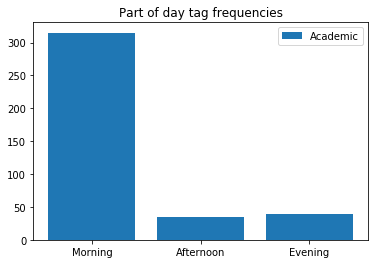

[4, 0, 0]


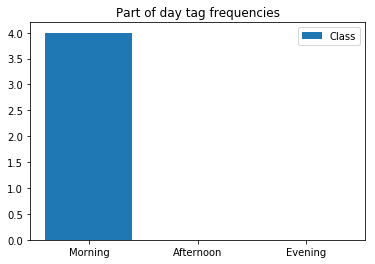

[173, 86, 10]


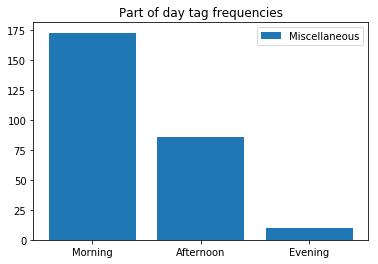

[22, 13, 3]


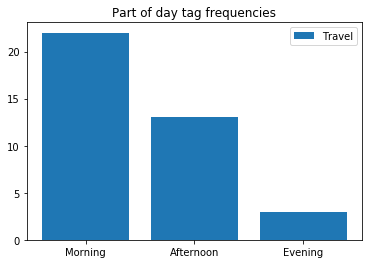

[5, 8, 6]


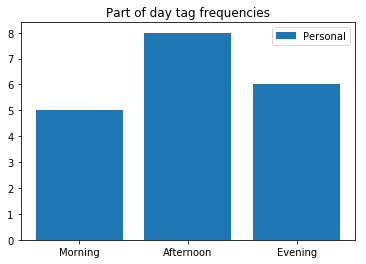

[6, 5, 0]


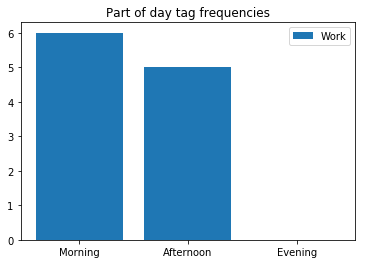

[0, 2, 2]


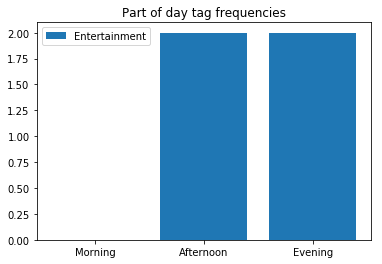

[1, 0, 0]


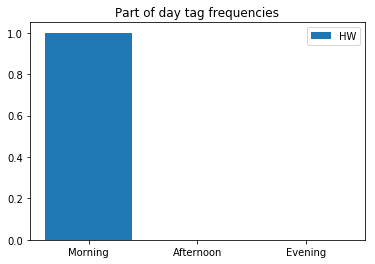

[1, 0, 2]


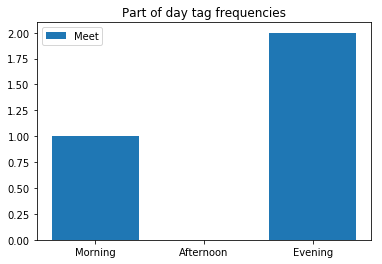

[0, 1, 0]


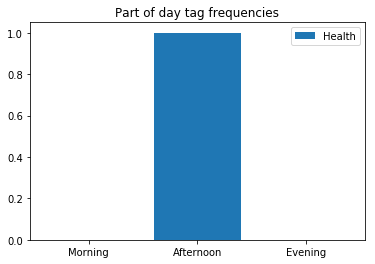

In [11]:
def tagtimecharts(data,keyword):
    listmorning=0
    listafternoon=0
    listevening=0
    bar_width=0.7
    for i,row in data.iterrows():
        if row['Tag']==keyword:
            if row['Part of day']=="Morning":
                listmorning=listmorning+1
            elif row['Part of day']=="Afternoon":
                listafternoon=listafternoon+1
            else:
                listevening=listevening+1

    listtimes=[listmorning,listafternoon,listevening]
    print(listtimes)
    plt.bar(np.arange(3), listtimes, align='center',label=keyword)
    plt.xticks(np.arange(3), ('Morning', 'Afternoon', 'Evening'))

    plt.title("Part of day tag frequencies")
    plt.legend()
    plt.show()
    
keywords = df1['Tag'].unique()
for i in keywords:
    tagtimecharts(df1, i)

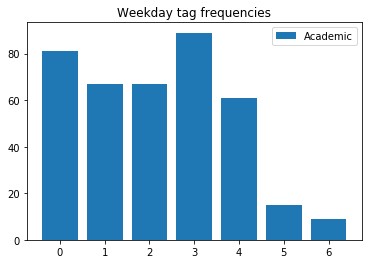

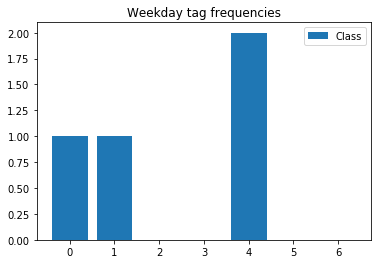

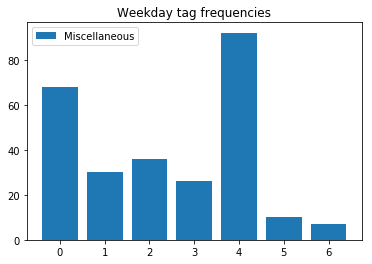

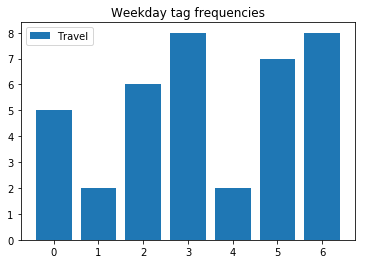

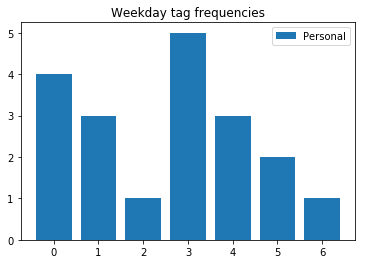

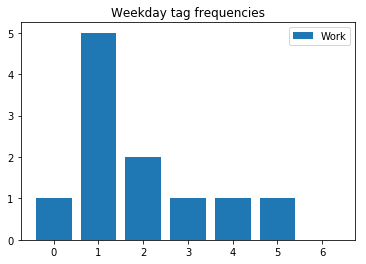

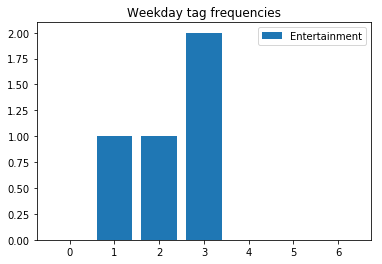

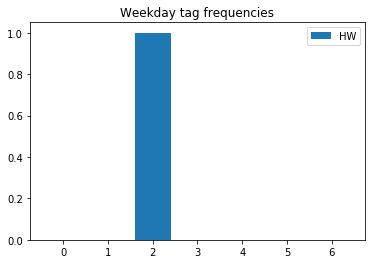

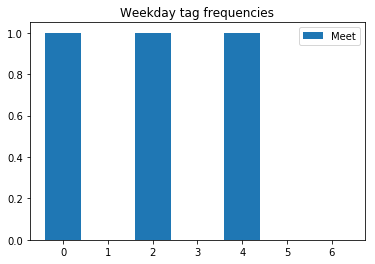

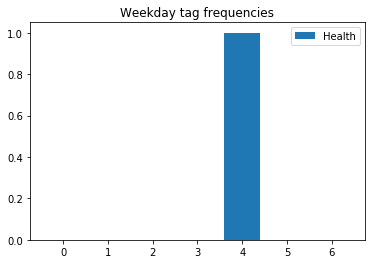

In [12]:
def tagtimecharts(data,keyword):
    weekdaylist=[0,0,0,0,0,0,0]
    for i,row in data.iterrows():
        if row['Tag']==keyword:
            weekdaylist[row['Weekday']]=weekdaylist[row['Weekday']]+1

    
    plt.bar(np.arange(7), weekdaylist, align='center',label=keyword)

    plt.title("Weekday tag frequencies")
    plt.legend()
    plt.show()
    
keywords = df1['Tag'].unique()
for i in keywords:
    tagtimecharts(df1, i)

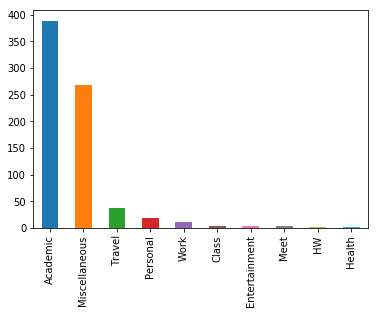

In [13]:
def tagcharts(data):
    fig, ax=plt.subplots()
    data['Tag'].value_counts().plot(ax=ax,kind='bar')
    
tagcharts(df1)

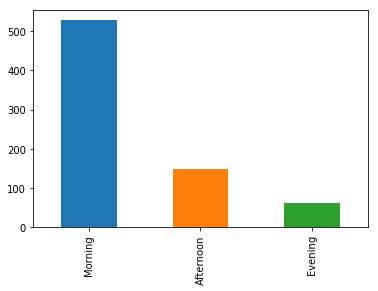

In [14]:
def timecharts(data):
    fig, ax=plt.subplots()
    data['Part of day'].value_counts().plot(ax=ax,kind='bar')
timecharts(df1)

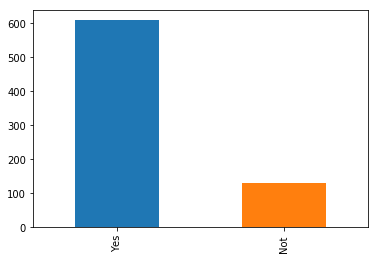

In [15]:
def holidaycharts(data):
    fig, ax=plt.subplots()
    data['Holiday'].value_counts().plot(ax=ax,kind='bar')
holidaycharts(df1)